In [0]:
#DIGIT REC KAGGLE


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"afrozml","key":"8302da84fd4c4f86c57ef0a1edcac636"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 63 Apr  2 13:55 kaggle.json
{"username":"afrozml","key":"8302da84fd4c4f86c57ef0a1edcac636"}

In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

In [0]:
!kaggle competitions list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 11, in <module>
    load_entry_point('kaggle==1.5.3', 'console_scripts', 'kaggle')()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 489, in load_entry_point
    return get_distribution(dist).load_entry_point(group, name)
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2793, in load_entry_point
    return ep.load()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2411, in load
    return self.resolve()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2417, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 116, in authenticate
    self.config_file, self.config_d

In [0]:
!kaggle competitions download -c 'digit-recognizer'


 86% 63.0M/73.2M [00:00<00:00, 131MB/s]
100% 73.2M/73.2M [00:00<00:00, 149MB/s]
 78% 38.0M/48.8M [00:00<00:00, 64.8MB/s]
100% 48.8M/48.8M [00:00<00:00, 90.4MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 59.0MB/s]


In [0]:
!ls


kaggle.json  sample_data  sample_submission.csv  test.csv  train.csv


In [0]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout,Lambda, Activation,Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import os

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

Using TensorFlow backend.


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Splite data the X - Our data , and y - the prdict label
X = train.drop('label',axis = 1)
y = train['label'].astype('category')


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)


print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Data after scaler


array([ 0.        ,  0.        , -0.00563445, -0.00650005, -0.00799336,
       -0.01102636, -0.01652788, -0.02006784, -0.02607858, -0.02964285,
       -0.03151185, -0.03072181, -0.03144806, -0.02994353, -0.03036525,
       -0.02848702, -0.02275272, -0.01677855, -0.01684028, -0.01112935])

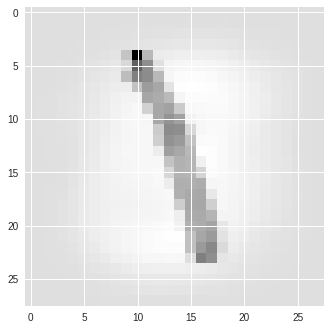

In [0]:
print("Data after scaler")
plt.imshow(X_train[0].reshape(28,28),interpolation='nearest', cmap='Greys')
X_train[0][30:50]

In [0]:
X_train = tf.reshape(X_train, [-1, 28, 28,1])
X_test = tf.reshape(X_test, [-1, 28, 28,1])

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dropout(0.25),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.25),    
    Dense(256, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, steps_per_epoch = 32,epochs=15, validation_data = (X_test, y_test), validation_steps = 10)

Train on 31500 samples, validate on 10500 samples
Epoch 1/15
32/32 [==============================] - 7s 208ms/step - loss: 0.6338 - acc: 0.8038 - val_loss: 0.2061 - val_acc: 0.9379
Epoch 2/15
32/32 [==============================] - 3s 81ms/step - loss: 0.2078 - acc: 0.9344 - val_loss: 0.1437 - val_acc: 0.9601
Epoch 3/15
32/32 [==============================] - 3s 80ms/step - loss: 0.1414 - acc: 0.9544 - val_loss: 0.1223 - val_acc: 0.9664
Epoch 4/15
32/32 [==============================] - 3s 80ms/step - loss: 0.1062 - acc: 0.9653 - val_loss: 0.1112 - val_acc: 0.9706
Epoch 5/15
32/32 [==============================] - 3s 80ms/step - loss: 0.0839 - acc: 0.9723 - val_loss: 0.1050 - val_acc: 0.9730
Epoch 6/15
32/32 [==============================] - 3s 81ms/step - loss: 0.0677 - acc: 0.9774 - val_loss: 0.0987 - val_acc: 0.9749
Epoch 7/15
32/32 [==============================] - 3s 81ms/step - loss: 0.0563 - acc: 0.9810 - val_loss: 0.0979 - val_acc: 0.9759
Epoch 8/15
32/32 [==============

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test, steps = 10)
print("loss",test_loss)
print("acc",test_acc)

10/10 [==============================] - 0s 11ms/step
loss 0.0895855575799942
acc 0.9786666631698608


In [0]:
fn =  "mymodel.h5"
model.save_weights(fn)

In [0]:
test2 = tf.reshape(test, [-1, 28, 28,1])
test2= test2/255

In [0]:

prd = model.predict(test2, steps=10)
print(prd)

[[4.1329626e-05 1.1136285e-05 9.9362624e-01 ... 8.4623013e-04
  3.9340672e-04 4.1500643e-05]
 [9.2021388e-01 1.6010604e-03 2.2762971e-02 ... 1.7190980e-03
  1.1064265e-03 7.3508150e-04]
 [1.0950494e-03 7.3579759e-03 1.3481258e-02 ... 1.2459329e-02
  3.0868104e-01 4.9460542e-01]
 ...
 [8.0848372e-07 1.6595663e-05 9.6236754e-06 ... 3.1272086e-06
  2.8049636e-03 3.2007657e-03]
 [7.8764505e-04 1.7904643e-04 4.2006353e-04 ... 1.3772415e-03
  2.4372457e-02 9.5599878e-01]
 [3.3666834e-05 5.8853795e-05 9.7564006e-01 ... 2.7517916e-04
  5.1088566e-03 7.0822443e-04]]


In [0]:
prd = np.argmax(prd, axis=1)
print(prd)

[2 0 9 ... 3 9 2]


In [0]:
# test.info()
df3 =  pd.read_csv("sample_submission.csv")
df3.info()
df3["Label"]=pd.Series(prd)
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
ImageId    28000 non-null int64
Label      28000 non-null int64
dtypes: int64(2)
memory usage: 437.6 KB


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [0]:
df3.to_csv("my_sub.csv", index=False)

In [0]:
# !kaggle competitions submit -c 'digit-recognizer' -f my_sub.csv -m "bla";

100% 208k/208k [00:02<00:00, 93.8kB/s]
Successfully submitted to Digit Recognizer

In [0]:
!kaggle competitions submit -c digit-recognizer -f my_sub.csv -m "Message"

100% 208k/208k [00:02<00:00, 105kB/s]
Successfully submitted to Digit Recognizer

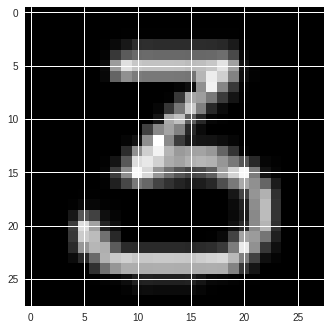

[3]
[[4.9380539e-04 2.2663181e-03 2.8681955e-03 7.2737598e-01 9.4008638e-04
  6.1984904e-02 1.4422915e-03 1.0081693e-03 1.4847535e-01 5.3144932e-02]]


In [0]:
import cv2
gray = cv2.imread("3.png", cv2.IMREAD_GRAYSCALE)
gray = cv2.resize(255-gray, (28, 28))
gray = gray/255
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()
pr = model.predict_classes(gray.reshape(1, 28, 28))
print(pr)
pr = model.predict(gray.reshape(1, 28, 28))
print(pr)

